#Campaña de Marketing para la adquisicion de depositos de clientes



##Introduccion

El caso que nos compete involucra a un banco que ha decidido ampliar su base de clientes y ofrecer productos financieros específicos, como los depósitos a plazo fijo. Para alcanzar este objetivo, ha optado por colaborar con una empresa de marketing especializada en la identificación y atracción de potenciales clientes.

El propósito principal un contacto efectivo con individuos que puedan estar interesados en adquirir un depósito a plazo fijo en el banco. Para lograrlo, es **esencial comprender el perfil de nuestro cliente principal**, lo que nos permitirá dirigir nuestros esfuerzos de manera más precisa y eficiente.

###Dataset

ACERCA: El conjunto de datos "marketing dirigido a bancos" es una colección de datos centrada en la campaña de marketing de un banco para captar depósitos de clientes. Este conjunto de datos contiene varios atributos relacionados con la demografía de los clientes como de sus
interacciones previas con el banco

#### Cargo las librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

####Cargo los datos

In [4]:
df = pd.read_csv('/content/BankMarketingDataset.csv')

Veamos algunas caracteristicas del Dataset

In [5]:
print(df.shape) #Indica el numero de (filas, columnas)
df.head() #Nos muestra las primeras 5 filas del dataset


(56373, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
#Veamos que tipo de variables tenemos, si de tipo categorica o numerica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


Tenemos un total de 17 variables, donde 7 son del tipo numericas y 10 del tipo categorica

####Descripcion de variables

Sintesis de los datos de las columnas

1. "age": Edad (numérico)
2. "job": Tipo de trabajo (categórico: "administrativo", "desconocido","desempleado", "gerencia", "ama de casa", "emprendedor", "estudiante", "blue-collar", "autónomo", "jubilado", "técnico", "servicios")
3. "marital": Estado civil (categórico: "casado", "divorciado", "soltero")
4. "education": Nivel educativo (categórico: "desconocido", "secundaria", "primaria", "terciaria")
5. "default": Si dejó de pagar sus obligaciones (categórico: "sí", "no")
6. "balance": Saldo anual en euros (numérico)
7. "housing": ¿Tiene crédito hipotecario? (categórico: "sí", "no")
8. "loan": ¿Tiene préstamos al consumo? (categórico: "sí", "no")
9. "contact": Medio por el cual fue contactada la persona (categórico: "desconocido", "teléfono", "celular")
10. "day": Último día en que se contactó a la persona (numérico)
11. "month": Último mes en que se contactó a la persona (categórico: "ene", "feb", "mar", ..., "nov", "dic")
12. "duration": Duración (en segundos) del último contacto (numérico)
13. "campaign": Número total de veces que la persona fue contactada durante la campaña (numérico)
14. "pdays": Número de días transcurridos después de que la persona fue contactada antes de la campaña actual (numérico, -1 indica que no fue contactada previamente)
15. "previous": Número de veces que la persona fue contactada antes de esta campaña (numérico)
16. "poutcome": Resultado de la última campaña de marketing (categórico: "desconocido", "otro", "fracaso", "éxito")
17. "deposit": ¿Se suscribió el cliente al producto (depósito fijo)? (categórico: "sí", "no")



###Analisis de nulos

De todas las variables que vimos con la anterior funcion debemos comprobar que tengan una cantidad de datos adecuada, es decir que no tenga tantos valores nulos

* La siguiente funcion filtra los valores nulos y muestra la cantidad en cada variable, mostrandolo en orden descendiente   

In [7]:
df.isna().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

Es decir, no tenemos valores nulos

###Visualizacion de datos

#### 1. Analicemos el salario percibido por cada sector de trabajo





<Figure size 1500x600 with 0 Axes>

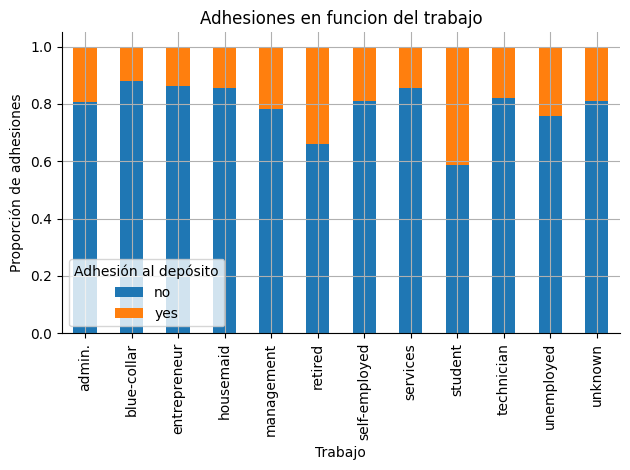

In [8]:
tabla0 = pd.crosstab(df.job, df.deposit)
tabla0 = tabla0.div(tabla0.sum(1).astype(float), axis=0)

# Plotting
plt.figure(figsize=(15, 6))

# Graficar barras apiladas
tabla0.plot(kind='bar', stacked=True)

plt.title('Adhesiones en funcion del trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Proporción de adhesiones')
plt.legend(title='Adhesión al depósito', loc="best")
plt.grid()

# Eliminar bordes superior y derecho del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Trabajo**: Notemos que el tipo de trabajo de los clientes tiene un fuerte impacto en la adhesion o la no adhesion al deposito

####2. Analicemos la distribucion de niveles de educacion

<Figure size 1500x600 with 0 Axes>

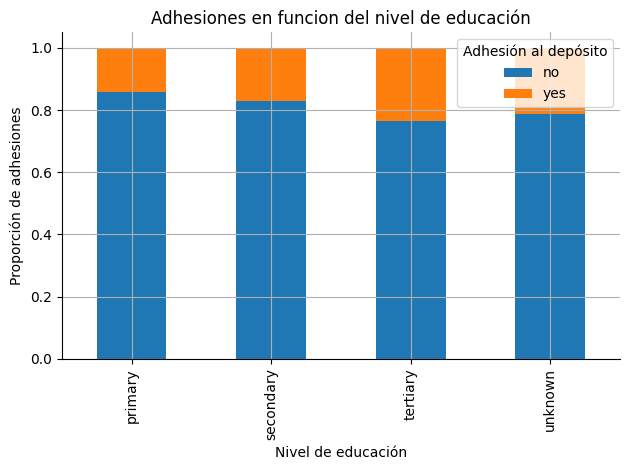

In [9]:
tabla1 = pd.crosstab(df.education, df.deposit)
tabla1 = tabla1.div(tabla1.sum(1).astype(float), axis=0)

# Plotting
plt.figure(figsize=(15, 6))

# Graficar barras apiladas
tabla1.plot(kind='bar', stacked=True)

plt.title('Adhesiones en funcion del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Proporción de adhesiones')
plt.legend(title='Adhesión al depósito', loc="best")
plt.grid()

# Eliminar bordes superior y derecho del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Educacion**: El nivel de educacion puede llegar a ser una variable predictora

####3. Analicemos en que momento del año se producen las adhesiones

<Figure size 1500x600 with 0 Axes>

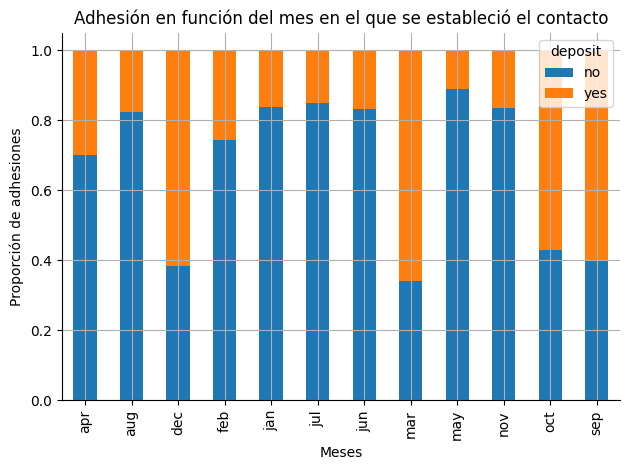

In [10]:
table2 = pd.crosstab(df.month, df.deposit)
table2 = table2.div(table2.sum(1).astype(float), axis=0)
plt.figure(figsize=(15, 6))
table2.plot(kind='bar', stacked=True)

plt.title('Adhesión en función del mes en el que se estableció el contacto')
plt.xlabel('Meses')
plt.ylabel('Proporción de adhesiones')
plt.grid()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Mes de contacto**: El mes de contacto repercute en la adhesion al deposito

####4. Analicemos la adhesion por edad y por balance

Los siguientes graficos buscan determinar si existe una relacion entre la adhesion al deposito, la edad y el balance

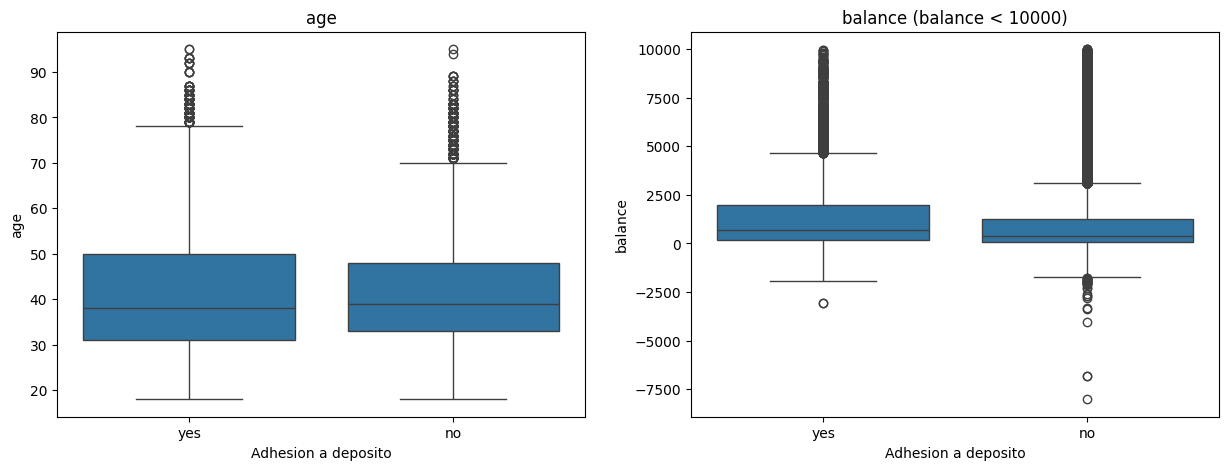

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.25)

sns.boxplot(x='deposit', y='age', data=df, ax=ax[0])
ax[0].set_xlabel('Adhesion a deposito')
ax[0].set_title('age')

filtered_df = df[df['balance'] < 10000]
sns.boxplot(x='deposit', y='balance', data=filtered_df, ax=ax[1])
ax[1].set_xlabel('Adhesion a deposito')
ax[1].set_title('balance (balance < 10000)')

plt.show()

 * **Edad y balance**: No hay una diferencia significativa en la media de la edad y la del balance y la adhesión al deposito, es probable que la edad no tenga mucho peso es dicha variable.

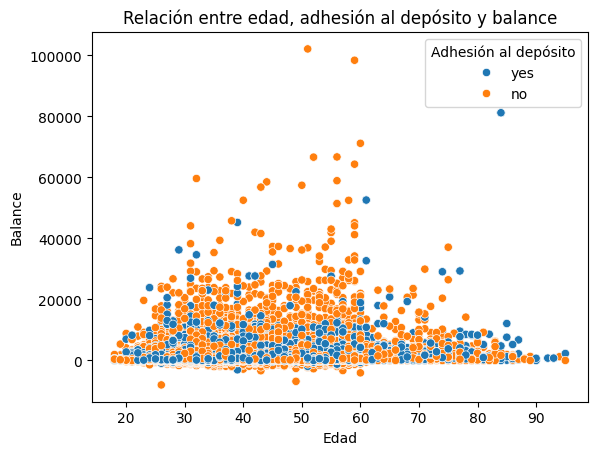

In [12]:
sns.scatterplot(x='age', y='balance', hue='deposit', data=df)

# Títulos y etiquetas
plt.title('Relación entre edad, adhesión al depósito y balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.legend(title='Adhesión al depósito')

# Mostrar el gráfico
plt.show()

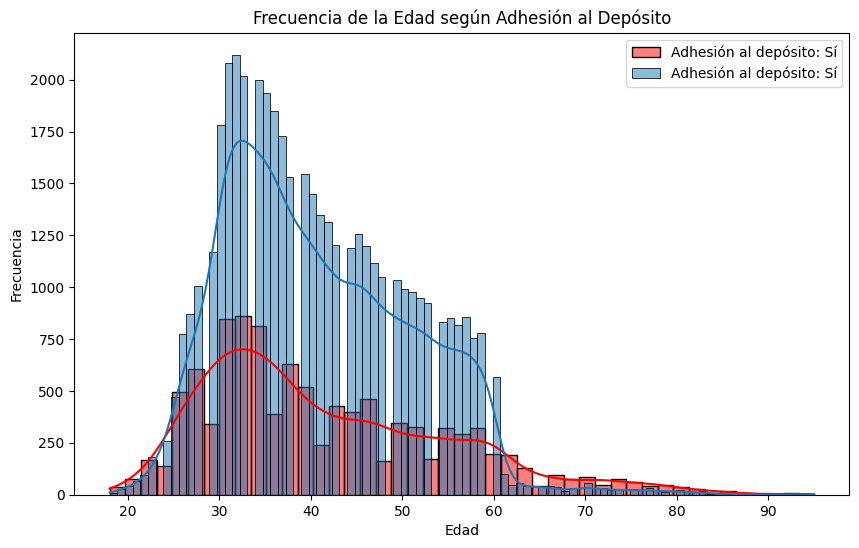

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df[df['deposit'] == 'yes']['age'], color='red', label='Adhesión al depósito: Sí', kde=True)
sns.histplot(df[df['deposit'] == 'no']['age'], label='Adhesión al depósito: Sí', kde=True)

# Títulos y etiquetas
plt.title('Frecuencia de la Edad según Adhesión al Depósito')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Vemos que ambos graficos de frecuencia se comportan igual, sin embargo, si bien la mayor frecuencia de adhesiones es en un rango de los 30 a los 40 años, nos encontramos en proporcion las adhesiones son mayores para los clientes de mas de 60 años